## keypoint Îã§Ïãú Ï∂îÏ∂ú

In [ ]:
import os
import cv2
import csv
import mediapipe as mp
from tqdm import tqdm

# Mediapipe Ï¥àÍ∏∞Ìôî
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# ÏÑ§Ï†ï
base_path = '/content/images'  # *_frames Ìè¥ÎçîÎì§Ïù¥ ÏûàÎäî Í≤ΩÎ°ú
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
target_size = (480, 480)

for pose_name in pose_list:
    input_folder = os.path.join(base_path, f'{pose_name}_frames')
    output_csv = os.path.join(base_path, f'keypoints_{pose_name}.csv')

    if not os.path.exists(input_folder):
        print(f"‚ùå Ìè¥Îçî ÏóÜÏùå: {input_folder}")
        continue

    image_files = sorted([f for f in os.listdir(input_folder) if f.lower().endswith(('.jpg', '.png'))])
    keypoints_data = []
    saved, skipped = 0, 0

    print(f"\nüìÇ [{pose_name}] {len(image_files)}Ïû• Ïù¥ÎØ∏ÏßÄÏóêÏÑú keypoint Ï∂îÏ∂ú Ï§ë...")

    for fname in tqdm(image_files):
        image_path = os.path.join(input_folder, fname)
        image = cv2.imread(image_path)

        if image is None:
            continue

        image_resized = cv2.resize(image, target_size)
        image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            row = [fname]
            for lm in results.pose_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.visibility])
            keypoints_data.append(row)
            saved += 1
        else:
            skipped += 1

    # CSV Ï†ÄÏû•
    header = ['filename']
    for i in range(33):
        header.extend([f'x{i}', f'y{i}', f'v{i}'])

    with open(output_csv, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        writer.writerows(keypoints_data)

    print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {output_csv} (ÏÑ±Í≥µ: {saved}, Ïã§Ìå®: {skipped})")

print("\nüéØ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ(640x640)ÏóêÏÑú keypoint Ï∂îÏ∂ú ÏôÑÎ£å!")


NotADirectoryError: [Errno 20] Not a directory: '/content/images/Ìï†ÎùºÏÇ¨ÎÇò.jpg'

In [ ]:
import os
import cv2
import csv
import mediapipe as mp
from tqdm import tqdm

# Mediapipe Ï¥àÍ∏∞Ìôî
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

# ÏÑ§Ï†ï
image_folder = '/content/images'  # Ïù¥ÎØ∏ÏßÄÎì§Ïù¥ ÏßÅÏ†ë ÏûàÎäî Ìè¥Îçî
output_csv = os.path.join(image_folder, 'keypoints_all.csv')
target_size = (480, 480)

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº ÏàòÏßë
image_files = sorted([
    f for f in os.listdir(image_folder)
    if f.lower().endswith(('.jpg', '.png'))
])

keypoints_data = []
saved, skipped = 0, 0

print(f"üìÇ Ï¥ù {len(image_files)}Ïû• Ïù¥ÎØ∏ÏßÄÏóêÏÑú keypoint Ï∂îÏ∂ú Ï§ë...")

for fname in tqdm(image_files):
    image_path = os.path.join(image_folder, fname)
    image = cv2.imread(image_path)

    if image is None:
        print(f"‚ö†Ô∏è Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞ Ïã§Ìå®: {fname}")
        skipped += 1
        continue

    image_resized = cv2.resize(image, target_size)
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        row = [fname]
        for lm in results.pose_landmarks.landmark:
            row.extend([lm.x, lm.y, lm.visibility])
        keypoints_data.append(row)
        saved += 1
    else:
        skipped += 1

# CSV Ï†ÄÏû•
header = ['filename']
for i in range(33):
    header.extend([f'x{i}', f'y{i}', f'v{i}'])

with open(output_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(keypoints_data)

print(f"\n‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {output_csv} (ÏÑ±Í≥µ: {saved}, Ïã§Ìå®: {skipped})")


üìÇ Ï¥ù 7Ïû• Ïù¥ÎØ∏ÏßÄÏóêÏÑú keypoint Ï∂îÏ∂ú Ï§ë...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7/7 [00:00<00:00, 15.12it/s]


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/images/keypoints_all.csv (ÏÑ±Í≥µ: 7, Ïã§Ìå®: 0)


In [ ]:
import os
import pandas as pd
import numpy as np

# ‚úÖ Ïñ¥Íπ®+Í≥®Î∞ò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî Ìï®Ïàò (min_scale Ï†ÅÏö©)
def preprocess_keypoints_shoulder_hip(df, image_width=480, image_height=480,
                                      visibility_threshold=0.3, mask_value=-1.0, min_scale=20.0):
    vectors = []
    for _, row in df.iterrows():
        vector = []

        # Ïñ¥Íπ®, Í≥®Î∞ò Í∏∞Ï§ÄÏ†ê Í≥ÑÏÇ∞
        x11, y11, v11 = row['x11'] * image_width, row['y11'] * image_height, row['v11']
        x12, y12, v12 = row['x12'] * image_width, row['y12'] * image_height, row['v12']
        x23, y23, v23 = row['x23'] * image_width, row['y23'] * image_height, row['v23']
        x24, y24, v24 = row['x24'] * image_width, row['y24'] * image_height, row['v24']

        if min(v11, v12, v23, v24) >= visibility_threshold:
            shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
            hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
            center = (shoulder_center + hip_center) / 2
            scale = max(np.linalg.norm(shoulder_center - hip_center), min_scale)  # ‚úÖ ÏµúÏÜå Ïä§ÏºÄÏùº Î≥¥Ïû•
        else:
            center, scale = None, None

        for i in range(33):
            x = row[f'x{i}'] * image_width
            y = row[f'y{i}'] * image_height
            v = row[f'v{i}']

            if v < visibility_threshold or center is None:
                x_out, y_out = mask_value, mask_value
            else:
                x_out = (x - center[0]) / scale
                y_out = (y - center[1]) / scale
            vector.extend([x_out, y_out, v])

        vectors.append(vector)
    return np.array(vectors)

# ‚úÖ Îã®Ïùº CSV Ï†ïÍ∑úÌôî ÌõÑ Ï†ÄÏû•
def normalize_single_keypoint_csv(input_csv, output_csv):
    if not os.path.exists(input_csv):
        print(f"‚ùå ÌååÏùº ÏóÜÏùå: {input_csv}")
        return

    df = pd.read_csv(input_csv)
    filenames = df.iloc[:, 0].values.reshape(-1, 1)
    kp_vectors = preprocess_keypoints_shoulder_hip(df)

    df_out = pd.DataFrame(
        np.concatenate([filenames, kp_vectors], axis=1),
        columns=['filename'] + [f'{a}{i}' for i in range(33) for a in ['x', 'y', 'v']]
    )
    df_out.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"‚úÖ Ï†ïÍ∑úÌôî ÏôÑÎ£å ‚Üí Ï†ÄÏû•: {output_csv}")



In [ ]:
input_csv = '/content/images/keypoints_all.csv'
output_csv = '/content/images/keypoints_all_norm.csv'

normalize_single_keypoint_csv(input_csv, output_csv)


‚úÖ Ï†ïÍ∑úÌôî ÏôÑÎ£å ‚Üí Ï†ÄÏû•: /content/images/keypoints_all_norm.csv


In [ ]:
import os
import pandas as pd

# ÏÑ§Ï†ï
base_path = '/content/drive/MyDrive/yoga/training'  # *_frames Ìè¥Îçî Î∞è keypoints_*.csv ÏûàÎäî Í≤ΩÎ°ú
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']

for pose in pose_list:
    image_folder = os.path.join(base_path, f'{pose}_frames')
    csv_path = os.path.join(base_path, f'keypoints_{pose}.csv')

    if not os.path.exists(csv_path):
        print(f"‚ùå CSV ÏóÜÏùå: {csv_path}")
        continue

    if not os.path.exists(image_folder):
        print(f"‚ùå Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî ÏóÜÏùå: {image_folder}")
        continue

    df = pd.read_csv(csv_path)
    used_filenames = set(df['filename'])

    deleted_count = 0

    for fname in os.listdir(image_folder):
        if fname.lower().endswith(('.jpg', '.png')) and fname not in used_filenames:
            os.remove(os.path.join(image_folder, fname))
            deleted_count += 1

    print(f"üßπ [{pose}] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ {deleted_count}Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å")

print("\n‚úÖ Î™®Îì† ÏûêÏÑ∏ Ìè¥ÎçîÏóêÏÑú Î∂àÌïÑÏöîÌïú Ïù¥ÎØ∏ÏßÄ Ï†ïÎ¶¨ ÏôÑÎ£å!")


üßπ [Ìï†ÎùºÏÇ¨ÎÇò] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 21Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [ÎÇòÎ∞îÏÇ¨ÎÇò] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 1Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 6Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 2Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 0Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 1Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å
üßπ [ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2] keypoint ÏóÜÎäî Ïù¥ÎØ∏ÏßÄ 0Ïû• ÏÇ≠Ï†ú ÏôÑÎ£å

‚úÖ Î™®Îì† ÏûêÏÑ∏ Ìè¥ÎçîÏóêÏÑú Î∂àÌïÑÏöîÌïú Ïù¥ÎØ∏ÏßÄ Ï†ïÎ¶¨ ÏôÑÎ£å!


### Ïñ¥Íπ®ÎßåÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†ïÍ∑úÌôî

In [ ]:
import os
import pandas as pd
import numpy as np

# ‚úÖ Ï†ïÍ∑úÌôî Ìï®Ïàò: Ïñ¥Íπ® Í∏∞Ï§Ä + ÏµúÏÜå Ïä§ÏºÄÏùº Î≥¥Ïû• + threshold=0.3
def preprocess_keypoints_with_pixels(df, image_width=480, image_height=480,
                                     visibility_threshold=0.3, mask_value=-1.0, min_scale=20.0):
    vectors = []
    for _, row in df.iterrows():
        vector = []

        # Ï¢åÏö∞ Ïñ¥Íπ® Í∏∞Ï§Ä
        x11 = row['x11'] * image_width
        x12 = row['x12'] * image_width
        y11 = row['y11'] * image_height
        y12 = row['y12'] * image_height
        v11, v12 = row['v11'], row['v12']

        if v11 >= visibility_threshold and v12 >= visibility_threshold:
            x_center = (x11 + x12) / 2
            y_center = (y11 + y12) / 2
            scale = np.linalg.norm([x11 - x12, y11 - y12])
            scale = max(scale, min_scale)
        else:
            x_center, y_center, scale = None, None, None

        for i in range(33):
            x = row[f'x{i}'] * image_width
            y = row[f'y{i}'] * image_height
            v = row[f'v{i}']

            if v < visibility_threshold or x_center is None:
                x_out, y_out = mask_value, mask_value
            else:
                x_out = (x - x_center) / scale
                y_out = (y - y_center) / scale

            vector.extend([x_out, y_out, v])
        vectors.append(vector)
    return np.array(vectors)

# ‚úÖ Ï†ÑÏ≤¥ CSVÏóê Ï†ïÍ∑úÌôî Ï†ÅÏö© ÌõÑ Ï†ÄÏû•
def save_all_processed_keypoints_pixel_norm(base_path, pose_list, output_suffix='_proc.csv'):
    os.makedirs(base_path, exist_ok=True)

    for pose in pose_list:
        src_path = os.path.join(base_path, f'keypoints_{pose}.csv')
        dst_path = os.path.join(base_path, f'keypoints_{pose}{output_suffix}')

        if not os.path.exists(src_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {src_path}")
            continue

        df = pd.read_csv(src_path)
        filenames = df.iloc[:, 0]
        kp_vectors = preprocess_keypoints_with_pixels(df)

        col_names = ['filename'] + [f'{a}{i}' for i in range(33) for a in ['x', 'y', 'v']]
        df_out = pd.DataFrame(np.column_stack([filenames, kp_vectors]), columns=col_names)
        df_out.to_csv(dst_path, index=False, encoding='utf-8-sig')
        print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {dst_path}")

    print("\nüì¶ Î™®Îì† keypoint Ï†ïÍ∑úÌôî ÏôÑÎ£å!")

# ‚úÖ Ïã§Ìñâ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_path = '/content/drive/MyDrive/yoga/training'

save_all_processed_keypoints_pixel_norm(base_path, pose_list)


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ìï†ÎùºÏÇ¨ÎÇò_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎÇòÎ∞îÏÇ¨ÎÇò_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1_proc.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2_proc.csv

üì¶ Î™®Îì† keypoint Ï†ïÍ∑úÌôî ÏôÑÎ£å!


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# ‚úÖ Ïù¥ÎØ∏ÏßÄ Î°úÎî© Ìï®Ïàò
def load_image_cv2(img_path, img_size=(480, 480)):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img.astype(np.float32) / 255.0

# ‚úÖ Í∞úÎ≥Ñ Ìè¨Ï¶à .npz Ï†ÄÏû• Ìï®Ïàò
def save_pose_npz_from_proc_csv(pose, label, base_image_path, base_csv_path, output_folder, img_size=(480, 480)):
    csv_path = os.path.join(base_csv_path, f'keypoints_{pose}_proc.csv')
    image_dir = os.path.join(base_image_path, f'{pose}_frames')
    save_path = os.path.join(output_folder, f'{pose}.npz')

    if not (os.path.exists(csv_path) and os.path.exists(image_dir)):
        print(f"‚ùå Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî: {csv_path} ÎòêÎäî {image_dir}")
        return 0

    df = pd.read_csv(csv_path)
    X_img, X_pose, y = [], [], []

    for _, row in df.iterrows():
        filename = row['filename']
        img_path = os.path.join(image_dir, filename)
        if not os.path.exists(img_path):
            continue

        img = load_image_cv2(img_path, img_size)
        if img is None:
            continue

        pose_vector = row.iloc[1:].to_numpy(dtype=np.float32)
        X_img.append(img)
        X_pose.append(pose_vector)
        y.append(label)

    if not X_img:
        print(f"‚ö†Ô∏è {pose} ‚Üí Ïú†Ìö® Ïù¥ÎØ∏ÏßÄ ÏóÜÏùå")
        return 0

    np.savez_compressed(save_path,
                        X_img=np.array(X_img),
                        X_pose=np.array(X_pose),
                        y=np.array(y, dtype=np.int32))
    print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {pose} ‚Üí {len(X_img)}Í∞ú ‚Üí {save_path}")
    return len(X_img)

# ‚úÖ Ï†ÑÏ≤¥ Ìè¨Ï¶à Ïã§Ìñâ
def convert_all_csv_to_npz(pose_list, base_image_path, base_csv_path, output_folder, img_size=(480, 480)):
    os.makedirs(output_folder, exist_ok=True)
    total = 0
    for label, pose in enumerate(pose_list):
        count = save_pose_npz_from_proc_csv(pose, label, base_image_path, base_csv_path, output_folder, img_size)
        total += count
    print(f"\nüì¶ Ï¥ù Î≥ÄÌôò ÏôÑÎ£å: {total}Í∞ú")

# ‚úÖ Ïã§Ìñâ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_path = '/content/drive/MyDrive/yoga/training'
output_npz_path = os.path.join(base_path, 'npz_split')

convert_all_csv_to_npz(pose_list, base_path, base_path, output_npz_path, img_size=(480, 480))


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Ìï†ÎùºÏÇ¨ÎÇò ‚Üí 1783Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/Ìï†ÎùºÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎÇòÎ∞îÏÇ¨ÎÇò ‚Üí 1808Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/ÎÇòÎ∞îÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ‚Üí 1808Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò ‚Üí 1731Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò ‚Üí 1803Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 ‚Üí 1672Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 ‚Üí 1803Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.npz

üì¶ Ï¥ù Î≥ÄÌôò ÏôÑÎ£å: 12408Í∞ú


In [ ]:
import os
import numpy as np
from collections import Counter

# ‚úÖ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ Î≥ëÌï© Ìï®Ïàò
def merge_npz_with_fixed_labels(npz_folder, output_path, pose_list):
    X_img_list, X_pose_list, y_list = [], [], []

    total_files = len(pose_list)
    print(f"üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù {total_files}Í∞ú Ìè¨Ï¶à")

    for label, pose_name in enumerate(pose_list):
        file_path = os.path.join(npz_folder, f"{pose_name}.npz")
        if not os.path.exists(file_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {file_path}")
            continue

        data = np.load(file_path)
        X_img = data["X_img"].astype(np.float32)
        X_pose = data["X_pose"].astype(np.float32)
        y = np.full(len(data["y"]), label, dtype=np.int32)  # ‚úÖ ÎùºÎ≤® Í≥†Ï†ï

        X_img_list.append(X_img)
        X_pose_list.append(X_pose)
        y_list.append(y)

        print(f"‚úÖ ({label + 1}/{total_files}) {pose_name} - ÏÉòÌîå Ïàò: {len(y)}")

    # Î≥ëÌï© Î∞è Ï†ÄÏû•
    X_img_all = np.concatenate(X_img_list, axis=0)
    X_pose_all = np.concatenate(X_pose_list, axis=0)
    y_all = np.concatenate(y_list, axis=0)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.savez_compressed(output_path, X_img=X_img_all, X_pose=X_pose_all, y=y_all)

    print(f"\nüì¶ Î≥ëÌï© ÏôÑÎ£å: {output_path}")
    print("üßæ ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y_all)))

# ‚úÖ Ïã§Ìñâ Ï§ÄÎπÑ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
npz_split_folder = '/content/drive/MyDrive/yoga/training/npz_split'
output_npz_path = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_shoulder_fixed.npz'


### Ïñ¥Íπ®ÏôÄ Í≥®Î∞ò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî

In [ ]:
import os
import pandas as pd
import numpy as np

# ‚úÖ Í≥®Î∞ò+Ïñ¥Íπ® Í∏∞Ï§Ä keypoint Ï†ïÍ∑úÌôî Ìï®Ïàò
def preprocess_keypoints_with_pixels(df, image_width=480, image_height=480,
                                     visibility_threshold=0.5, mask_value=-1.0):
    vectors = []
    for _, row in df.iterrows():
        vector = []

        # Ï¢åÏö∞ Ïñ¥Íπ® (11, 12), Ï¢åÏö∞ Í≥®Î∞ò (23, 24)
        x11, y11, v11 = row['x11'] * image_width, row['y11'] * image_height, row['v11']
        x12, y12, v12 = row['x12'] * image_width, row['y12'] * image_height, row['v12']
        x23, y23, v23 = row['x23'] * image_width, row['y23'] * image_height, row['v23']
        x24, y24, v24 = row['x24'] * image_width, row['y24'] * image_height, row['v24']

        # Ï§ëÏã¨ Î∞è Ïä§ÏºÄÏùº Í≥ÑÏÇ∞
        if min(v11, v12, v23, v24) >= visibility_threshold:
            shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
            hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
            center = (shoulder_center + hip_center) / 2
            scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6
        else:
            center, scale = None, None

        for i in range(33):
            x = row[f'x{i}'] * image_width
            y = row[f'y{i}'] * image_height
            v = row[f'v{i}']

            if v < visibility_threshold or center is None:
                x_out, y_out = mask_value, mask_value
            else:
                x_out = (x - center[0]) / scale
                y_out = (y - center[1]) / scale
            vector.extend([x_out, y_out, v])
        vectors.append(vector)
    return np.array(vectors)


# ‚úÖ Ï†ïÍ∑úÌôî ÌõÑ Ï†ÄÏû• Ìï®Ïàò
def save_all_processed_keypoints_pixel_norm(base_path, pose_list, output_suffix='_proc2.csv'):
    os.makedirs(base_path, exist_ok=True)

    for pose in pose_list:
        src_path = os.path.join(base_path, f'keypoints_{pose}.csv')
        dst_path = os.path.join(base_path, f'keypoints_{pose}{output_suffix}')

        if not os.path.exists(src_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {src_path}")
            continue

        df = pd.read_csv(src_path)
        filenames = df.iloc[:, 0]
        kp_vectors = preprocess_keypoints_with_pixels(df)

        col_names = ['filename'] + [f'{a}{i}' for i in range(33) for a in ['x', 'y', 'v']]
        df_out = pd.DataFrame(np.column_stack([filenames, kp_vectors]), columns=col_names)
        df_out.to_csv(dst_path, index=False, encoding='utf-8-sig')
        print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {dst_path}")

    print("\nüì¶ Î™®Îì† keypoint Ï†ÑÏ≤òÎ¶¨ ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!")


# ‚úÖ ÏòàÏãú Ïã§ÌñâÏö© pose Î™©Î°ù
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_path = '/content/drive/MyDrive/yoga/training'

# ‚úÖ Ïã§Ìñâ
save_all_processed_keypoints_pixel_norm(base_path, pose_list)


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ìï†ÎùºÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎÇòÎ∞îÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2_proc2.csv

üì¶ Î™®Îì† keypoint Ï†ÑÏ≤òÎ¶¨ ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å!


In [ ]:
import os
import pandas as pd
import numpy as np

# ‚úÖ Ï†ïÍ∑úÌôî Ìï®Ïàò: Ïñ¥Íπ®+Í≥®Î∞ò Í∏∞Ï§Ä + threshold=0.3
def preprocess_keypoints_shoulder_hip(df, image_width=480, image_height=480,
                                      visibility_threshold=0.3, mask_value=-1.0):
    vectors = []
    for _, row in df.iterrows():
        vector = []

        # Ïñ¥Íπ®(11,12), Í≥®Î∞ò(23,24)
        x11, y11, v11 = row['x11'] * image_width, row['y11'] * image_height, row['v11']
        x12, y12, v12 = row['x12'] * image_width, row['y12'] * image_height, row['v12']
        x23, y23, v23 = row['x23'] * image_width, row['y23'] * image_height, row['v23']
        x24, y24, v24 = row['x24'] * image_width, row['y24'] * image_height, row['v24']

        # Ï§ëÏã¨Ï†ê Î∞è Ïä§ÏºÄÏùº Í≥ÑÏÇ∞
        if min(v11, v12, v23, v24) >= visibility_threshold:
            shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
            hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
            center = (shoulder_center + hip_center) / 2
            scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6  # ÎÇòÎàóÏÖà Î∞©ÏßÄ
        else:
            center, scale = None, None

        for i in range(33):
            x = row[f'x{i}'] * image_width
            y = row[f'y{i}'] * image_height
            v = row[f'v{i}']

            if v < visibility_threshold or center is None:
                x_out, y_out = mask_value, mask_value
            else:
                x_out = (x - center[0]) / scale
                y_out = (y - center[1]) / scale
            vector.extend([x_out, y_out, v])
        vectors.append(vector)
    return np.array(vectors)

# ‚úÖ Ï†ÄÏû• Ìï®Ïàò
def save_all_processed_keypoints_shoulder_hip(base_path, pose_list, output_suffix='_proc2.csv'):
    os.makedirs(base_path, exist_ok=True)

    for pose in pose_list:
        src_path = os.path.join(base_path, f'keypoints_{pose}.csv')
        dst_path = os.path.join(base_path, f'keypoints_{pose}{output_suffix}')

        if not os.path.exists(src_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {src_path}")
            continue

        df = pd.read_csv(src_path)
        filenames = df.iloc[:, 0]
        kp_vectors = preprocess_keypoints_shoulder_hip(df)

        col_names = ['filename'] + [f'{a}{i}' for i in range(33) for a in ['x', 'y', 'v']]
        df_out = pd.DataFrame(np.column_stack([filenames, kp_vectors]), columns=col_names)
        df_out.to_csv(dst_path, index=False, encoding='utf-8-sig')
        print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {dst_path}")

    print("\nüì¶ Ïñ¥Íπ®+Í≥®Î∞ò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî ÏôÑÎ£å!")

# ‚úÖ Ïã§Ìñâ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_path = '/content/drive/MyDrive/yoga/training'

save_all_processed_keypoints_shoulder_hip(base_path, pose_list)


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ìï†ÎùºÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎÇòÎ∞îÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1_proc2.csv
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/keypoints_ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2_proc2.csv

üì¶ Ïñ¥Íπ®+Í≥®Î∞ò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî ÏôÑÎ£å!


In [ ]:
import os
import pandas as pd
import numpy as np

# ‚úÖ Ïñ¥Íπ®+Í≥®Î∞ò Í∏∞Ï§Ä Ï†ïÍ∑úÌôî Ìï®Ïàò
def preprocess_keypoints_shoulder_hip(df, image_width=480, image_height=480,
                                      visibility_threshold=0.3, mask_value=-1.0):
    vectors = []
    for _, row in df.iterrows():
        vector = []

        # Í∏∞Ï§ÄÏ†ê Í≥ÑÏÇ∞Ïö© Ï¢åÌëú (ÌîΩÏÖÄ)
        x11, y11, v11 = row['x11'] * image_width, row['y11'] * image_height, row['v11']
        x12, y12, v12 = row['x12'] * image_width, row['y12'] * image_height, row['v12']
        x23, y23, v23 = row['x23'] * image_width, row['y23'] * image_height, row['v23']
        x24, y24, v24 = row['x24'] * image_width, row['y24'] * image_height, row['v24']

        if min(v11, v12, v23, v24) >= visibility_threshold:
            shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
            hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
            center = (shoulder_center + hip_center) / 2
            scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6
        else:
            center, scale = None, None

        for i in range(33):
            x = row[f'x{i}'] * image_width
            y = row[f'y{i}'] * image_height
            v = row[f'v{i}']
            if v < visibility_threshold or center is None:
                x_out, y_out = mask_value, mask_value
            else:
                x_out = (x - center[0]) / scale
                y_out = (y - center[1]) / scale
            vector.extend([x_out, y_out, v])

        vectors.append(vector)
    return np.array(vectors)

# ‚úÖ keypoints/*.csv ÌïòÎÇòÏî© Ï†ïÍ∑úÌôîÌï¥ÏÑú Ï†ÄÏû•
def normalize_all_single_keypoint_csvs(input_folder, output_folder, suffix='_proc.csv'):
    os.makedirs(output_folder, exist_ok=True)

    files = sorted([f for f in os.listdir(input_folder) if f.endswith('.csv')])
    print(f"üìÇ Ï¥ù {len(files)}Í∞ú keypoint CSV Ï†ïÍ∑úÌôî ÏãúÏûë")

    for file in files:
        src_path = os.path.join(input_folder, file)
        df = pd.read_csv(src_path)

        # Îã®Ïùº ÌîÑÎ†àÏûÑ CSV ÌååÏùºÏùº Í≤ΩÏö∞ -> 1 rowÎßå ÏûàÏùÑ Í≤É
        if df.shape[0] != 1:
            print(f"‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: {file}")
            continue

        kp_vector = preprocess_keypoints_shoulder_hip(df)  # shape: (1, 99)
        if kp_vector.shape[0] == 0:
            print(f"‚ùå Ï†ïÍ∑úÌôî Ïã§Ìå®: {file}")
            continue

        # ÌååÏùº Ï†ÄÏû•
        out_df = pd.DataFrame(kp_vector, columns=[f'{a}{i}' for i in range(33) for a in ['x', 'y', 'v']])
        out_name = os.path.splitext(file)[0] + suffix
        out_path = os.path.join(output_folder, out_name)
        out_df.to_csv(out_path, index=False)
        print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {out_name}")

    print("\nüéØ Ï†ÑÏ≤¥ Ï†ïÍ∑úÌôî ÏôÑÎ£å!")

# ‚úÖ Ïã§Ìñâ Í≤ΩÎ°ú ÏÑ§Ï†ï
input_folder = '/content/images/keypoints'
output_folder = '/content/images/keypoints_normalized'

normalize_all_single_keypoint_csvs(input_folder, output_folder)


üìÇ Ï¥ù 7Í∞ú keypoint CSV Ï†ïÍ∑úÌôî ÏãúÏûë
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: ÎÇòÎ∞îÏÇ¨ÎÇò.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.csv
‚ö†Ô∏è 1ÌñâÏù¥ ÏïÑÎãå CSV Î¨¥ÏãúÎê®: Ìï†ÎùºÏÇ¨ÎÇò.csv

üéØ Ï†ÑÏ≤¥ Ï†ïÍ∑úÌôî ÏôÑÎ£å!


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

# ‚úÖ Ïù¥ÎØ∏ÏßÄ Î°úÎî© Ìï®Ïàò
def load_image_cv2(img_path, img_size=(480, 480)):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img.astype(np.float32) / 255.0

# ‚úÖ Í∞úÎ≥Ñ Ìè¨Ï¶à .npz Ï†ÄÏû• Ìï®Ïàò
def save_pose_npz_from_proc_csv(pose, label, base_image_path, base_csv_path, output_folder, img_size=(480, 480)):
    csv_path = os.path.join(base_csv_path, f'keypoints_{pose}_proc.csv')
    image_dir = os.path.join(base_image_path, f'{pose}_frames')
    save_path = os.path.join(output_folder, f'{pose}.npz')

    if not (os.path.exists(csv_path) and os.path.exists(image_dir)):
        print(f"‚ùå Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî: {csv_path} ÎòêÎäî {image_dir}")
        return 0

    df = pd.read_csv(csv_path)
    X_img, X_pose, y = [], [], []

    for _, row in df.iterrows():
        filename = row['filename']
        img_path = os.path.join(image_dir, filename)
        if not os.path.exists(img_path):
            continue

        img = load_image_cv2(img_path, img_size)
        if img is None:
            continue

        pose_vector = row.iloc[1:].to_numpy(dtype=np.float32)
        X_img.append(img)
        X_pose.append(pose_vector)
        y.append(label)

    if not X_img:
        print(f"‚ö†Ô∏è {pose} ‚Üí Ïú†Ìö® Ïù¥ÎØ∏ÏßÄ ÏóÜÏùå")
        return 0

    np.savez_compressed(save_path,
                        X_img=np.array(X_img),
                        X_pose=np.array(X_pose),
                        y=np.array(y, dtype=np.int32))
    print(f"‚úÖ Ï†ÄÏû• ÏôÑÎ£å: {pose} ‚Üí {len(X_img)}Í∞ú ‚Üí {save_path}")
    return len(X_img)

# ‚úÖ Ï†ÑÏ≤¥ Ìè¨Ï¶à Ïã§Ìñâ
def convert_all_csv_to_npz(pose_list, base_image_path, base_csv_path, output_folder, img_size=(480, 480)):
    os.makedirs(output_folder, exist_ok=True)
    total = 0
    for label, pose in enumerate(pose_list):
        count = save_pose_npz_from_proc_csv(pose, label, base_image_path, base_csv_path, output_folder, img_size)
        total += count
    print(f"\nüì¶ Ï¥ù Î≥ÄÌôò ÏôÑÎ£å: {total}Í∞ú")

# ‚úÖ Ïã§Ìñâ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_path = '/content/drive/MyDrive/yoga/training'
output_npz_path = os.path.join(base_path, 'npz_split/plus')

convert_all_csv_to_npz(pose_list, base_path, base_path, output_npz_path, img_size=(480, 480))


‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Ìï†ÎùºÏÇ¨ÎÇò ‚Üí 1783Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/Ìï†ÎùºÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎÇòÎ∞îÏÇ¨ÎÇò ‚Üí 1808Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/ÎÇòÎ∞îÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ‚Üí 1808Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò ‚Üí 1731Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò ‚Üí 1803Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 ‚Üí 1672Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.npz
‚úÖ Ï†ÄÏû• ÏôÑÎ£å: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 ‚Üí 1803Í∞ú ‚Üí /content/drive/MyDrive/yoga/training/npz_split/plus/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.npz

üì¶ Ï¥ù Î≥ÄÌôò ÏôÑÎ£å: 12408Í∞ú


In [ ]:
import os
import numpy as np
from collections import Counter

# ‚úÖ Î©îÎ™®Î¶¨ Ìö®Ïú®Ï†ÅÏù∏ Î≥ëÌï© Ìï®Ïàò
def merge_npz_with_fixed_labels(npz_folder, output_path, pose_list):
    X_img_list, X_pose_list, y_list = [], [], []

    total_files = len(pose_list)
    print(f"üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù {total_files}Í∞ú Ìè¨Ï¶à")

    for label, pose_name in enumerate(pose_list):
        file_path = os.path.join(npz_folder, f"{pose_name}.npz")
        if not os.path.exists(file_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {file_path}")
            continue

        data = np.load(file_path)
        X_img = data["X_img"].astype(np.float32)
        X_pose = data["X_pose"].astype(np.float32)
        y = np.full(len(data["y"]), label, dtype=np.int32)  # ‚úÖ ÎùºÎ≤® Í≥†Ï†ï

        X_img_list.append(X_img)
        X_pose_list.append(X_pose)
        y_list.append(y)

        print(f"‚úÖ ({label + 1}/{total_files}) {pose_name} - ÏÉòÌîå Ïàò: {len(y)}")

    # Î≥ëÌï© Î∞è Ï†ÄÏû•
    X_img_all = np.concatenate(X_img_list, axis=0)
    X_pose_all = np.concatenate(X_pose_list, axis=0)
    y_all = np.concatenate(y_list, axis=0)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.savez_compressed(output_path, X_img=X_img_all, X_pose=X_pose_all, y=y_all)

    print(f"\nüì¶ Î≥ëÌï© ÏôÑÎ£å: {output_path}")
    print("üßæ ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y_all)))

# ‚úÖ Ïã§Ìñâ Ï§ÄÎπÑ
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
npz_split_folder = '/content/drive/MyDrive/yoga/training/npz_split/plus'
output_npz_path = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_shoulderplus_fixed.npz'


In [ ]:
!ls '/content/drive/MyDrive/yoga/training'


 keypoints_·ÑÇ·Ö°·Ñá·Ö°·Ñâ·Ö°·ÑÇ·Ö°.csv			    keypoints_·Ñí·Ö°·ÜØ·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°.csv
 keypoints_·ÑÇ·Ö°·Ñá·Ö°·Ñâ·Ö°·ÑÇ·Ö°_proc.csv		    keypoints_·Ñí·Ö°·ÜØ·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°_proc.csv
 keypoints_·Ñá·ÖÆ·Ñå·Ö°·Üº·ÑÄ·Ö°·Ñâ·Ö°·ÑÇ·Ö°.csv		    npz_output
 keypoints_·Ñá·ÖÆ·Ñå·Ö°·Üº·ÑÄ·Ö°·Ñâ·Ö°·ÑÇ·Ö°_proc.csv		    ·ÑÇ·Ö°·Ñá·Ö°·Ñâ·Ö°·ÑÇ·Ö°_frames
 keypoints_·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°1.csv		    ·Ñá·ÖÆ·Ñå·Ö°·Üº·ÑÄ·Ö°·Ñâ·Ö°·ÑÇ·Ö°_frames
 keypoints_·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°1_proc.csv	    ·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°1_frames
 keypoints_·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°2.csv		    ·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°2_frames
 keypoints_·Ñá·Öµ·ÑÖ·Ö°·Ñá·Ö°·ÑÉ·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°2_proc.csv	   '·Ñã·Ö°·ÑÉ·Ö© ·ÑÜ·ÖÆ·Ñè·Ö° ·Ñâ·Ö≥·Ñá·Ö°·ÑÇ·Ö°·Ñâ·Ö°·ÑÇ·Ö°_frames'
'keypoints_·Ñã·Ö°·ÑÉ·Ö© ·ÑÜ·ÖÆ·Ñè·Ö° ·Ñâ·Ö≥·Ñá·Ö°·ÑÇ·Ö°·Ñâ·Ö°·ÑÇ·Ö°.csv'	    ·Ñã·ÖÆ·Ñâ·Ö≥·Ñê·Ö≥·ÑÖ·Ö°·Ñâ·Ö°·ÑÇ·Ö°_frames
'keypoints_·Ñã·Ö°·ÑÉ·Ö© ·ÑÜ·ÖÆ·Ñè·Ö° ·Ñâ·Ö≥·Ñá·Ö°·ÑÇ·Ö°·Ñâ·Ö°·ÑÇ·Ö

In [ ]:
!pip install tensorflow

## npz ÌååÏùº ÎßåÎì§Í∏∞

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2

# ‚úÖ Ïù¥ÎØ∏ÏßÄ Î°úÎî© Ìï®Ïàò
def load_image_cv2(img_path, img_size):
    img = cv2.imread(img_path)
    if img is None:
        return None
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img.astype(np.float32) / 255.0

# ‚úÖ Î≥ëÌï© ÏóÜÏù¥ Í∞Å Ìè¨Ï¶àÎ≥Ñ npz Ï†ÄÏû• + ÏßÑÌñâÎ•† Ï∂úÎ†• (RAM ÏµúÏ†ÅÌôî & Îπ†Î•∏ Ï≤òÎ¶¨)
def save_all_pose_npz_individual(pose_list, base_image_path, base_csv_path, output_folder, img_size=(480,480)):
    os.makedirs(output_folder, exist_ok=True)
    results = []

    for label, pose in enumerate(pose_list):
        csv_path = os.path.join(base_csv_path, f'keypoints_{pose}_proc2.csv')
        image_dir = os.path.join(base_image_path, f'{pose}_frames')
        save_path = os.path.join(output_folder, f'{pose}2.npz')

        if not (os.path.exists(csv_path) and os.path.exists(image_dir)):
            results.append((pose, "‚ùå ÌååÏùº ÏóÜÏùå", 0))
            continue

        df = pd.read_csv(csv_path)
        filenames = df['filename'].tolist()
        pose_vectors = df.iloc[:, 1:].astype(np.float32).values

        X_img, X_pose, y = [], [], []
        total = len(filenames)
        last_printed_percent = -1

        for idx, (fname, vector) in enumerate(zip(filenames, pose_vectors)):
            img_path = os.path.join(image_dir, fname)
            img = load_image_cv2(img_path, img_size)
            if img is None:
                continue
            X_img.append(img)
            X_pose.append(vector)
            y.append(label)

            # ‚úÖ ÌçºÏÑºÌä∏ Îã®ÏúÑ Ï∂úÎ†• (10% Îã®ÏúÑÎ°úÎßå)
            percent = int((idx + 1) / total * 100)
            if percent % 10 == 0 and percent != last_printed_percent:
                print(f"‚è≥ {pose} ÏßÑÌñâÎ•†: {percent}%")
                last_printed_percent = percent

        if not X_img:
            results.append((pose, "‚ö†Ô∏è Ïú†Ìö® Ïù¥ÎØ∏ÏßÄ ÏóÜÏùå", 0))
            continue

        np.savez_compressed(save_path,
                            X_img=np.array(X_img),
                            X_pose=np.array(X_pose),
                            y=np.array(y, dtype=np.int32))
        results.append((pose, "‚úÖ Ï†ÄÏû• ÏôÑÎ£å", len(X_img)))

    return pd.DataFrame(results, columns=["ÏûêÏÑ∏", "ÏÉÅÌÉú", "ÏÉòÌîå Ïàò"])


# ‚úÖ Ïã§Ìñâ ÌååÎùºÎØ∏ÌÑ∞
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
base_image_path = '/content/drive/MyDrive/yoga/training'
base_csv_path = '/content/drive/MyDrive/yoga/training'
output_folder = '/content/drive/MyDrive/yoga/training/npz_split'

# ‚úÖ Ïã§Ìñâ
df_result = save_all_pose_npz_individual(pose_list, base_image_path, base_csv_path, output_folder, img_size=(480, 480))


‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 0%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 10%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 20%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 30%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 40%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 50%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 60%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 70%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 80%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 90%
‚è≥ Ìï†ÎùºÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 100%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 0%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 10%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 20%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 30%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 40%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 50%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 60%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 70%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 80%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 90%
‚è≥ ÎÇòÎ∞îÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 100%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 0%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 10%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 20%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 30%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 40%
‚è≥ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò ÏßÑÌñâÎ•†: 50%
‚è≥

In [ ]:
import os
import numpy as np
from collections import Counter

def merge_npz_with_fixed_labels(npz_folder, output_path, pose_list):
    X_img_list, X_pose_list, y_list = [], [], []

    total_files = len(pose_list)
    print(f"üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù {total_files}Í∞ú Ìè¨Ï¶à")

    for label, pose_name in enumerate(pose_list):
        file_path = os.path.join(npz_folder, f"{pose_name}.npz")
        if not os.path.exists(file_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {file_path}")
            continue

        data = np.load(file_path)
        X_img = data["X_img"].astype(np.float32)
        X_pose = data["X_pose"].astype(np.float32)
        y = np.full(len(data["y"]), label, dtype=np.int32)  # ‚úÖ ÎùºÎ≤® Ïû¨Ï†ïÏùò

        X_img_list.append(X_img)
        X_pose_list.append(X_pose)
        y_list.append(y)

        print(f"‚úÖ ({label + 1}/{total_files}) {pose_name} - ÏÉòÌîå Ïàò: {len(y)}")

    X_img_all = np.concatenate(X_img_list, axis=0)
    X_pose_all = np.concatenate(X_pose_list, axis=0)
    y_all = np.concatenate(y_list, axis=0)

    # Ï†ÄÏû•
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.savez_compressed(output_path, X_img=X_img_all, X_pose=X_pose_all, y=y_all)

    print(f"\nüì¶ Î≥ëÌï© ÏôÑÎ£å: {output_path}")
    print("üßæ ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y_all)))

# ‚úÖ Ïã§Ìñâ ÏòàÏãú
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
npz_split_folder = '/content/drive/MyDrive/yoga/training/npz_split/'
output_npz_path = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_fixed.npz'

merge_npz_with_fixed_labels(npz_split_folder, output_npz_path, pose_list)


üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù 7Í∞ú Ìè¨Ï¶à
‚úÖ (1/7) Ìï†ÎùºÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1783
‚úÖ (2/7) ÎÇòÎ∞îÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1808
‚úÖ (3/7) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1808
‚úÖ (4/7) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1731
‚úÖ (5/7) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1803
‚úÖ (6/7) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 - ÏÉòÌîå Ïàò: 1672
‚úÖ (7/7) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 - ÏÉòÌîå Ïàò: 1803

üì¶ Î≥ëÌï© ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/npz_output/all_poses_fixed.npz
üßæ ÎùºÎ≤® Î∂ÑÌè¨: {np.int32(0): 1783, np.int32(1): 1808, np.int32(2): 1808, np.int32(3): 1731, np.int32(4): 1803, np.int32(5): 1672, np.int32(6): 1803}


In [ ]:
import os
import numpy as np
from collections import Counter

def merge_npz_with_fixed_labels(npz_folder, output_path, pose_list):
    X_img_list, X_pose_list, y_list = [], [], []

    total_files = len(pose_list)
    print(f"üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù {total_files}Í∞ú Ìè¨Ï¶à")

    for label, pose_name in enumerate(pose_list):
        file_path = os.path.join(npz_folder, f"{pose_name}.npz")
        if not os.path.exists(file_path):
            print(f"‚ùå ÌååÏùº ÏóÜÏùå: {file_path}")
            continue

        data = np.load(file_path)
        X_img = data["X_img"].astype(np.float32)
        X_pose = data["X_pose"].astype(np.float32)
        y = np.full(len(data["y"]), label, dtype=np.int32)  # ‚úÖ ÎùºÎ≤® Ïû¨Ï†ïÏùò

        X_img_list.append(X_img)
        X_pose_list.append(X_pose)
        y_list.append(y)

        print(f"‚úÖ ({label + 1}/{total_files}) {pose_name} - ÏÉòÌîå Ïàò: {len(y)}")

    X_img_all = np.concatenate(X_img_list, axis=0)
    X_pose_all = np.concatenate(X_pose_list, axis=0)
    y_all = np.concatenate(y_list, axis=0)

    # Ï†ÄÏû•
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    np.savez_compressed(output_path, X_img=X_img_all, X_pose=X_pose_all, y=y_all)

    print(f"\nüì¶ Î≥ëÌï© ÏôÑÎ£å: {output_path}")
    print("üßæ ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y_all)))

# ‚úÖ Ïã§Ìñâ ÏòàÏãú
pose_list = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò',
             'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
npz_split_folder = '/content/drive/MyDrive/yoga/training/npz_split/plus'
output_npz_path = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed.npz'

merge_npz_with_fixed_labels(npz_split_folder, output_npz_path, pose_list)


üìÇ Î≥ëÌï© ÏãúÏûë - Ï¥ù 7Í∞ú Ìè¨Ï¶à
‚úÖ (1/7) Ìï†ÎùºÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1783
‚úÖ (2/7) ÎÇòÎ∞îÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1808
‚úÖ (3/7) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1808
‚úÖ (4/7) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1731
‚úÖ (5/7) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò - ÏÉòÌîå Ïàò: 1803
‚úÖ (6/7) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 - ÏÉòÌîå Ïàò: 1672
‚úÖ (7/7) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 - ÏÉòÌîå Ïàò: 1803

üì¶ Î≥ëÌï© ÏôÑÎ£å: /content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed.npz
üßæ ÎùºÎ≤® Î∂ÑÌè¨: {np.int32(0): 1783, np.int32(1): 1808, np.int32(2): 1808, np.int32(3): 1731, np.int32(4): 1803, np.int32(5): 1672, np.int32(6): 1803}


In [ ]:
!pip install tensorflow

## Ïñ¥Íπ®Îßå Ï§ëÏã¨ÏúºÎ°ú Ïû°ÏïòÏùÑ Îïå

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from collections import Counter

# ‚úÖ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÌÅ¥ÎûòÏä§
class NPZBatchGenerator(Sequence):
    def __init__(self, X_img, X_pose, y, batch_size=16, shuffle=True):
        self.X_img = X_img
        self.X_pose = X_pose
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(y))
        if shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.y) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        return {
            'image_input': self.X_img[batch_indices],
            'keypoint_input': self.X_pose[batch_indices]
        }, self.y[batch_indices]

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# ‚úÖ Î™®Îç∏ Íµ¨ÏÑ±
def build_model(input_shape=(480, 480, 3), pose_shape=(99,), num_classes=7):
    img_input = Input(shape=input_shape, name='image_input')
    pose_input = Input(shape=pose_shape, name='keypoint_input')

    base_model = MobileNetV2(include_top=False, input_tensor=img_input, weights='imagenet', alpha=0.75)
    x_img = GlobalAveragePooling2D()(base_model.output)
    x_img = BatchNormalization()(x_img)

    x_pose = Dense(128, activation='relu')(pose_input)
    x_pose = BatchNormalization()(x_pose)
    x_pose = Dropout(0.5)(x_pose)

    x = Concatenate()([x_img, x_pose])
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=[img_input, pose_input], outputs=output)

# ‚úÖ ÌïôÏäµ Ìï®Ïàò
def train_with_generator(npz_path, batch_size=16, epochs=80, lr=3e-4):
    data = np.load(npz_path, mmap_mode='r')  # ‚úÖ RAM ÏïÑÎÅºÍ∏∞ ÏúÑÌï¥ mmap_mode ÏÇ¨Ïö©
    X_img, X_pose, y = data['X_img'], data['X_pose'], data['y']

    print("üìä ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y)))

    X_img_train, X_img_val, X_pose_train, X_pose_val, y_train, y_val = train_test_split(
        X_img, X_pose, y, test_size=0.2, stratify=y, random_state=42
    )

    train_gen = NPZBatchGenerator(X_img_train, X_pose_train, y_train, batch_size=batch_size)
    val_gen = NPZBatchGenerator(X_img_val, X_pose_val, y_val, batch_size=batch_size, shuffle=False)

    model = build_model(input_shape=(480, 480, 3), pose_shape=(99,), num_classes=7)
    model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint(npz_path.replace('.npz', '_best_model.keras'), save_best_only=True),
        ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
    ]

    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs, callbacks=callbacks)
    return model, history


## Ïñ¥Íπ® + Í≥®Î∞ò

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
from collections import Counter

# ‚úÖ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÌÅ¥ÎûòÏä§
class NPZBatchGenerator(Sequence):
    def __init__(self, X_img, X_pose, y, batch_size=16, shuffle=True):
        self.X_img = X_img
        self.X_pose = X_pose
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(y))
        if shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.y) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        return {
            'image_input': self.X_img[batch_indices],
            'keypoint_input': self.X_pose[batch_indices]
        }, self.y[batch_indices]

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

# ‚úÖ Î™®Îç∏ Íµ¨ÏÑ±
def build_model(input_shape=(480, 480, 3), pose_shape=(99,), num_classes=7):
    img_input = Input(shape=input_shape, name='image_input')
    pose_input = Input(shape=pose_shape, name='keypoint_input')

    base_model = MobileNetV2(include_top=False, input_tensor=img_input, weights='imagenet', alpha=0.75)
    x_img = GlobalAveragePooling2D()(base_model.output)
    x_img = BatchNormalization()(x_img)

    x_pose = Dense(128, activation='relu')(pose_input)
    x_pose = BatchNormalization()(x_pose)
    x_pose = Dropout(0.5)(x_pose)

    x = Concatenate()([x_img, x_pose])
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    return Model(inputs=[img_input, pose_input], outputs=output)

# ‚úÖ ÌïôÏäµ Ìï®Ïàò
def train_with_generator(npz_path, batch_size=16, epochs=80, lr=3e-4):
    data = np.load(npz_path, mmap_mode='r')  # ‚úÖ RAM ÏïÑÎÅºÍ∏∞ ÏúÑÌï¥ mmap_mode ÏÇ¨Ïö©
    X_img, X_pose, y = data['X_img'], data['X_pose'], data['y']

    print("üìä ÎùºÎ≤® Î∂ÑÌè¨:", dict(Counter(y)))

    X_img_train, X_img_val, X_pose_train, X_pose_val, y_train, y_val = train_test_split(
        X_img, X_pose, y, test_size=0.2, stratify=y, random_state=42
    )

    train_gen = NPZBatchGenerator(X_img_train, X_pose_train, y_train, batch_size=batch_size)
    val_gen = NPZBatchGenerator(X_img_val, X_pose_val, y_val, batch_size=batch_size, shuffle=False)

    model = build_model(input_shape=(480, 480, 3), pose_shape=(99,), num_classes=7)
    model.compile(optimizer=Adam(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint(npz_path.replace('.npz', '_best_model_plus.keras'), save_best_only=True),
        ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
    ]

    history = model.fit(train_gen, validation_data=val_gen, epochs=epochs, callbacks=callbacks)
    return model, history


In [ ]:
train_with_generator(
    npz_path='/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed.npz',
    batch_size=16,
    epochs=80
)


üìä ÎùºÎ≤® Î∂ÑÌè¨: {np.int32(0): 1742, np.int32(1): 1795, np.int32(2): 1771, np.int32(3): 1679, np.int32(4): 1736, np.int32(5): 1639, np.int32(6): 1744}


<ipython-input-6-f680db271ebe>:44: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_tensor=img_input, weights='imagenet', alpha=0.75)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/80
606/606 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 153s 137ms/step - accuracy: 0.9000 - loss: 0.3346 - val_accuracy: 0.7325 - val_loss: 1.3020 - learning_rate: 3.0000e-04
Epoch 2/80
606/606 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 62ms/step - accuracy: 0.9904 - loss: 0.0415 - val_accuracy: 0.6899 - val_loss: 2.4622 - learning_rate: 3.0000e-04
Epoch 3/80
606/606 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 62ms/step - accuracy: 0.9976 - loss: 0.0209 - val_accuracy: 0.9744 - val_loss: 0.0596 - learning_rate: 3.0000e-04
Epoch 4/80
606/606 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 61ms/step - accuracy: 0.9928 - loss: 0.0391 - val_accuracy: 0.9422 - val_loss: 0.1848 - learning_rate: 3.0000e-04
Epoch 5/80
606/606 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 61ms/step - accuracy: 0.9961 - loss: 0.0303 - val_accuracy: 0.6144 - val_loss: 3.6795 - learning_rate: 3.0000e-04
Epoch 6/

(<Functional name=functional, built=True>,
 <keras.src.callbacks.history.History at 0x7d68086e4e90>)

In [ ]:
train_with_generator(
    npz_path='/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed.npz',
    batch_size=16,
    epochs=80
)


üìä ÎùºÎ≤® Î∂ÑÌè¨: {np.int32(0): 1783, np.int32(1): 1808, np.int32(2): 1808, np.int32(3): 1731, np.int32(4): 1803, np.int32(5): 1672, np.int32(6): 1803}


<ipython-input-2-f680db271ebe>:44: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_tensor=img_input, weights='imagenet', alpha=0.75)


Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


621/621 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 150s 131ms/step - accuracy: 0.8920 - loss: 0.3671 - val_accuracy: 0.9351 - val_loss: 0.4906 - learning_rate: 3.0000e-04
Epoch 2/80
621/621 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 39s 62ms/step - accuracy: 0.9872 - loss: 0.0547 - val_accuracy: 0.9637 - val_loss: 0.1082 - learning_rate: 3.0000e-04
Epoch 3/80
621/621 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 62ms/step - accuracy: 0.9861 - loss: 0.0639 - val_accuracy: 0.9879 - val_loss: 0.0606 - learning_rate: 3.0000e-04
Epoch 4/80
621/621 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 61ms/step - accuracy: 0.9944 - loss: 0.0324 - val_accuracy: 0.9545 - val_loss: 0.2719 - learning_rate: 3.0000e-04
Epoch 5/80
621/621 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 38s 60ms/step - accuracy: 0.9932 - loss: 0.0297 - val_accuracy: 0.7200 - val_loss: 2.4579 - learning_rate: 3.0000e-04
Epoch 6/80
621/621 

(<Functional name=functional, built=True>,
 <keras.src.callbacks.history.History at 0x7db6d80e2a10>)

In [ ]:
np.bincount(y)

array([1749, 1795, 1773, 1679, 1738, 1639, 1744])

### Î©ÄÌã∞Î™®Îã¨ ÏòàÏ∏°Ìï¥Î≥¥Í∏∞

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model

# ‚úÖ ÏÑ§Ï†ï
IMAGE_DIR = '/content/'
MODEL_PATH = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed_best_model_plus.keras'
IMAGE_SIZE = 480
POSE_LABELS = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']

# ‚úÖ Î™®Îç∏ Î°úÎî©
model = load_model(MODEL_PATH)

# ‚úÖ Mediapipe Ï¥àÍ∏∞Ìôî
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

# ‚úÖ Í≥®Î∞ò+Ïñ¥Íπ® Í∏∞Ï§Ä Ï†ïÍ∑úÌôî Ìï®Ïàò
def normalize_keypoints_pelvis_shoulder(kpts, image_width=480, image_height=480,
                                        threshold=0.3, mask_value=-1.0):
    # Í∏∞Ï§ÄÏ†ê Ï∂îÏ∂ú
    x11, y11, v11 = kpts[11]
    x12, y12, v12 = kpts[12]
    x23, y23, v23 = kpts[23]
    x24, y24, v24 = kpts[24]

    x11, y11 = x11 * image_width, y11 * image_height
    x12, y12 = x12 * image_width, y12 * image_height
    x23, y23 = x23 * image_width, y23 * image_height
    x24, y24 = x24 * image_width, y24 * image_height

    # Ï§ëÏã¨ Î∞è Ïä§ÏºÄÏùº Í≥ÑÏÇ∞
    if min(v11, v12, v23, v24) >= threshold:
        shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
        hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
        center = (shoulder_center + hip_center) / 2
        scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6
    else:
        center, scale = None, None

    # Ï†ïÍ∑úÌôî Î≤°ÌÑ∞ ÏÉùÏÑ±
    vector = []
    for i in range(33):
        x, y, v = kpts[i]
        x *= image_width
        y *= image_height

        if v < threshold or center is None:
            x_out, y_out = mask_value, mask_value
        else:
            x_out = (x - center[0]) / scale
            y_out = (y - center[1]) / scale

        vector.extend([x_out, y_out, v])

    return np.array(vector, dtype=np.float32)

# ‚úÖ keypoint Ï∂îÏ∂ú
def extract_keypoints_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose_detector.process(img_rgb)
    if not results.pose_landmarks:
        return None, None

    keypoints = []
    for i in range(33):
        lm = results.pose_landmarks.landmark[i]
        keypoints.append([lm.x, lm.y, lm.visibility])
    return img_resized.astype(np.float32) / 255.0, np.array(keypoints)

# ‚úÖ ÏòàÏ∏° ÏàòÌñâ
files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

for idx, fname in enumerate(files, start=1):
    img_path = os.path.join(IMAGE_DIR, fname)
    img_input, kpts = extract_keypoints_from_image(img_path)

    if kpts is None:
        print(f"[{idx}/{len(files)}] ‚ùå Keypoint Ïã§Ìå®: {fname}")
        continue

    kp_vector = normalize_keypoints_pelvis_shoulder(kpts)
    pred = model.predict({
        'image_input': np.expand_dims(img_input, axis=0),
        'keypoint_input': np.expand_dims(kp_vector, axis=0)
    }, verbose=0)

    top3_idx = np.argsort(pred[0])[::-1][:3]
    top3 = [(POSE_LABELS[i], float(pred[0][i])) for i in top3_idx]

    print(f"[{idx}/{len(files)}] ‚úÖ {fname}")
    for rank, (label, score) in enumerate(top3, start=1):
        print(f"   {rank}) {label} ({score:.4f})")

print("\n‚úÖ Ï†ÑÏ≤¥ ÏòàÏ∏° ÏôÑÎ£å!")


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[1/10] ‚úÖ ÎÇòÎ∞îÏÇ¨ÎÇò.jpg
   1) ÎÇòÎ∞îÏÇ¨ÎÇò (1.0000)
   2) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (0.0000)
   3) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 (0.0000)
[2/10] ‚úÖ Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.jpg
   1) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (1.0000)
   2) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 (0.0000)
   3) ÎÇòÎ∞îÏÇ¨ÎÇò (0.0000)
[3/10] ‚úÖ Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò1.jpg
   1) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (0.8068)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.1037)
   3) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.0589)
[4/10] ‚úÖ ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.jpg
   1) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 (1.0000)
   2) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.0000)
   3) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 (0.0000)
[5/10] ‚úÖ ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.jpg
   1) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 (1.0000)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.0000)
   3) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (0.0000)
[6/10] ‚úÖ ÎπÑÎùºÎ∞îÎìúÎùºÏïÑÏÇ¨ÎÇò2.jpg
   1) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2 (0.9998)
   2) ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 (0.0002)
   3) Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (0.0000)
[7/10] ‚úÖ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.jpg
   1) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò (1.0000)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.0000)
   3) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.0000)
[8/10] ‚úÖ Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.jpg
   1)

In [ ]:
import pandas as pd
import numpy as np

# Ï†ïÎãµ CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = '/content/images/keypoints_all_norm.csv'
df = pd.read_csv(csv_path)

# Í∏∞Ï§Ä Ìè¨Ï¶à Î≤°ÌÑ∞ Ï∂îÏ∂ú Ìï®Ïàò
def get_reference_keypoint_vector(filename: str):
    row = df[df['filename'] == filename]
    if row.empty:
        return None
    vector = row.iloc[0].iloc[1:].values.astype(np.float32)  # Ï≤´ Î≤àÏß∏ ÌñâÏùò ÎÇòÎ®∏ÏßÄ Ïó¥ (x0~v32)
    return vector


In [ ]:
# Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
reference_vector = get_reference_keypoint_vector(fname)

if reference_vector is not None:
    score = get_cosine_similarity_score(kp_vector, reference_vector)
    print(f"   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): {score:.2f}Ï†ê")
else:
    print("   ‚ö†Ô∏è Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ ÏóÜÏùå")


In [ ]:
# Ïù¥Í±¥ Í≥®Î∞ò + Ïñ¥Íπ®

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

def visualize_pose_with_score(image, keypoints, score, predicted_label, color=(0, 255, 0)):
    """
    Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê keypointÏôÄ Ï†êÏàòÎ•º ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    image_copy = image.copy()
    for i, (x, y, v) in enumerate(keypoints):
        if v > 0.3:
            cx, cy = int(x * IMAGE_SIZE), int(y * IMAGE_SIZE)
            cv2.circle(image_copy, (cx, cy), 4, color, -1)
            # Î≤àÌò∏ ÌëúÏãú (ÏõêÌïúÎã§Î©¥)
            # cv2.putText(image_copy, str(i), (cx+3, cy-3), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

    # ÌÖçÏä§Ìä∏ Ïò§Î≤ÑÎ†àÏù¥ (Ï†êÏàò & ÏòàÏ∏° ÎùºÎ≤®)
    label_text = f'{predicted_label} / Ï†êÏàò: {score:.1f}'
    cv2.putText(image_copy, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, (0, 0, 255), 2, cv2.LINE_AA)

    # matplotlibÏúºÎ°ú Î≥¥Ïó¨Ï£ºÍ∏∞
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ‚úÖ ÏÑ§Ï†ï
IMAGE_DIR = '/content/testimage'
MODEL_PATH = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_fixed_best_model.keras'
IMAGE_SIZE = 480
POSE_LABELS = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']

# ‚úÖ Î™®Îç∏ Î°úÎî©
model = load_model(MODEL_PATH)

# ‚úÖ Mediapipe Ï¥àÍ∏∞Ìôî
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

# ‚úÖ Í≥®Î∞ò+Ïñ¥Íπ® Í∏∞Ï§Ä Ï†ïÍ∑úÌôî Ìï®Ïàò
def normalize_keypoints_pelvis_shoulder(kpts, image_width=480, image_height=480,
                                        threshold=0.3, mask_value=-1.0):
    # Í∏∞Ï§ÄÏ†ê Ï∂îÏ∂ú
    x11, y11, v11 = kpts[11]
    x12, y12, v12 = kpts[12]
    x23, y23, v23 = kpts[23]
    x24, y24, v24 = kpts[24]

    # Ï†ïÍ∑úÌôîÏö© Ïä§ÏºÄÏùº Î∞è Ï§ëÏã¨ Í≥ÑÏÇ∞
    x11, y11 = x11 * image_width, y11 * image_height
    x12, y12 = x12 * image_width, y12 * image_height
    x23, y23 = x23 * image_width, y23 * image_height
    x24, y24 = x24 * image_width, y24 * image_height

    if min(v11, v12, v23, v24) >= threshold:
        shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
        hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
        center = (shoulder_center + hip_center) / 2
        scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6  # 0 ÎÇòÎàóÏÖà Î∞©ÏßÄ
    else:
        center, scale = None, None

    # Ï†ÑÏ≤¥ keypoint Ï†ïÍ∑úÌôî
    vector = []
    for i in range(33):
        x, y, v = kpts[i]
        x *= image_width
        y *= image_height

        if v < threshold or center is None:
            x_out, y_out = mask_value, mask_value
        else:
            x_out = (x - center[0]) / scale
            y_out = (y - center[1]) / scale

        vector.extend([x_out, y_out, v])
    return np.array(vector, dtype=np.float32)


# ‚úÖ keypoint Ï∂îÏ∂ú
def extract_keypoints_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose_detector.process(img_rgb)
    if not results.pose_landmarks:
        return None, None

    keypoints = []
    for i in range(33):
        lm = results.pose_landmarks.landmark[i]
        keypoints.append([lm.x, lm.y, lm.visibility])
    return img_resized.astype(np.float32) / 255.0, np.array(keypoints)

# ‚úÖ ÏòàÏ∏° ÏàòÌñâ
files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

for idx, fname in enumerate(files, start=1):
    img_path = os.path.join(IMAGE_DIR, fname)
    img_input, kpts = extract_keypoints_from_image(img_path)

    if kpts is None:
        print(f"[{idx}/{len(files)}] ‚ùå Keypoint Ïã§Ìå®: {fname}")
        continue

    kp_vector = normalize_keypoints_pelvis_shoulder(kpts)
    pred = model.predict({
        'image_input': np.expand_dims(img_input, axis=0),
        'keypoint_input': np.expand_dims(kp_vector, axis=0)
    }, verbose=0)

    top3_idx = np.argsort(pred[0])[::-1][:3]
    top3 = [(POSE_LABELS[i], float(pred[0][i])) for i in top3_idx]

    print(f"[{idx}/{len(files)}] ‚úÖ {fname}")
    for rank, (label, score) in enumerate(top3, start=1):
        print(f"   {rank}) {label} ({score:.4f})")
    # Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
    reference_vector = get_reference_keypoint_vector(fname)
    # Ï†ïÎãµ CSV ÌååÏùº Í≤ΩÎ°ú
    csv_path = '/content/images/keypoints_all_norm.csv'
    df = pd.read_csv(csv_path)

    # Í∏∞Ï§Ä Ìè¨Ï¶à Î≤°ÌÑ∞ Ï∂îÏ∂ú Ìï®Ïàò
    def get_reference_keypoint_vector(filename: str):
        row = df[df['filename'] == filename]
        if row.empty:
            return None
        vector = row.iloc[0].iloc[1:].values.astype(np.float32)  # Ï≤´ Î≤àÏß∏ ÌñâÏùò ÎÇòÎ®∏ÏßÄ Ïó¥ (x0~v32)
        return vector
    # ‚úÖ Cosine Similarity Í∏∞Î∞ò Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
    def get_cosine_similarity_score(vec1, vec2):
        from numpy.linalg import norm
        vec1 = np.array(vec1)
        vec2 = np.array(vec2)

        # ÎßàÏä§ÌÇπÎêú Ï¢åÌëú Ï†úÏô∏ (x, yÎßå ÎπÑÍµê)
        valid_idx = [(i % 3 != 2) and vec1[i] != -1.0 and vec2[i] != -1.0 for i in range(len(vec1))]
        v1 = vec1[valid_idx]
        v2 = vec2[valid_idx]

        if norm(v1) == 0 or norm(v2) == 0:
            return 0.0
        return round(np.dot(v1, v2) / (norm(v1) * norm(v2)) * 100, 2)

    if reference_vector is not None:
        score = get_cosine_similarity_score(kp_vector, reference_vector)
        print(f"   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): {score:.2f}Ï†ê")
    else:
        print("   ‚ö†Ô∏è Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ ÏóÜÏùå")
    visualize_pose_with_score(
    image=img_resized,
    keypoints=kpts,
    score=score,
    predicted_label=top3[0][0]  # 1ÏàúÏúÑ ÏòàÏ∏° ÎùºÎ≤®
    )

print("\n‚úÖ Ï†ÑÏ≤¥ ÏòàÏ∏° ÏôÑÎ£å!")


/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[1/5] ‚úÖ Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.jpg
   1) ÎÇòÎ∞îÏÇ¨ÎÇò (0.5920)
   2) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.1902)
   3) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò (0.0915)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 43.97Ï†ê


NameError: name 'img_resized' is not defined

/usr/local/lib/python3.11/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[1/5] ‚úÖ Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.jpg
   1) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.6430)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.2085)
   3) Ìï†ÎùºÏÇ¨ÎÇò (0.1051)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 36.59Ï†ê


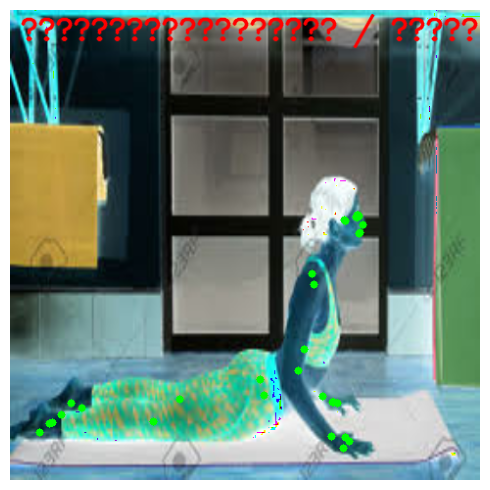

[2/5] ‚úÖ ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.jpg
   1) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.3443)
   2) Ìï†ÎùºÏÇ¨ÎÇò (0.3196)
   3) ÎÇòÎ∞îÏÇ¨ÎÇò (0.2214)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 63.66Ï†ê


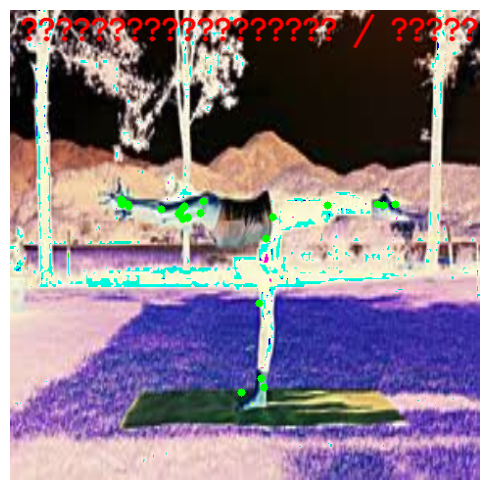

[3/5] ‚úÖ ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.jpg
   1) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.5439)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.2608)
   3) Ìï†ÎùºÏÇ¨ÎÇò (0.1275)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 99.04Ï†ê


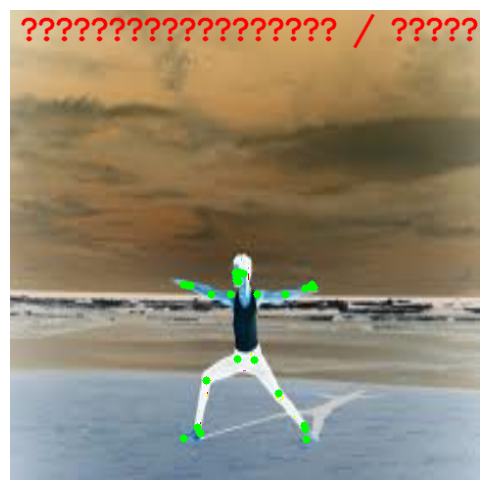

[4/5] ‚úÖ ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.jpg
   1) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò (0.8383)
   2) Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (0.1262)
   3) ÎÇòÎ∞îÏÇ¨ÎÇò (0.0209)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 45.83Ï†ê


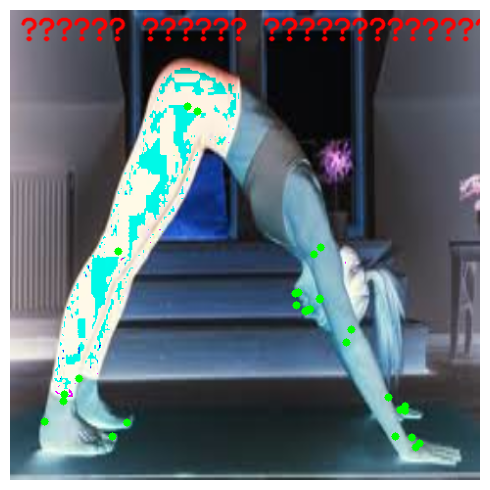

[5/5] ‚úÖ Ìï†ÎùºÏÇ¨ÎÇò.jpg
   1) Ìï†ÎùºÏÇ¨ÎÇò (0.9288)
   2) ÎÇòÎ∞îÏÇ¨ÎÇò (0.0363)
   3) ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò (0.0264)
   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): 17.01Ï†ê


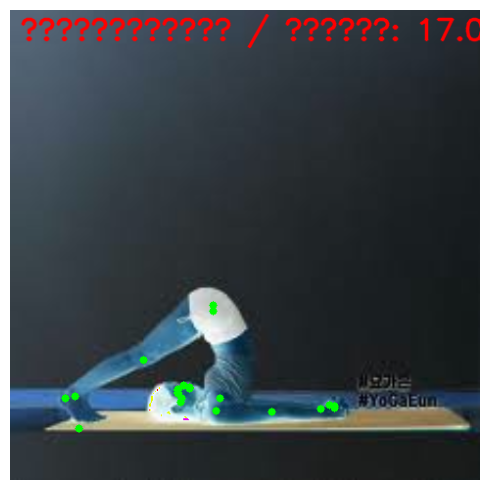


‚úÖ Ï†ÑÏ≤¥ ÏòàÏ∏° ÏôÑÎ£å!


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# ‚úÖ ÏÑ§Ï†ï
IMAGE_DIR = '/content/testimage'
MODEL_PATH = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_fixed_best_model.keras'
CSV_PATH = '/content/images/keypoints_all_norm.csv'
IMAGE_SIZE = 480
POSE_LABELS = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']

# ‚úÖ Î™®Îç∏ Î°úÎî©
model = load_model(MODEL_PATH)

# ‚úÖ Ï†ïÎãµ CSV Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(CSV_PATH)

# ‚úÖ Í∏∞Ï§Ä Î≤°ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞ Ìï®Ïàò
def get_reference_keypoint_vector(filename: str):
    row = df[df['filename'] == filename]
    if row.empty:
        return None
    vector = row.iloc[0].iloc[1:].values.astype(np.float32)
    return vector

# ‚úÖ Ïú†ÏÇ¨ÎèÑ Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò (Cosine Similarity)
def get_cosine_similarity_score(vec1, vec2):
    from numpy.linalg import norm
    if norm(vec1) == 0 or norm(vec2) == 0:
        return 0.0
    return round(np.dot(vec1, vec2) / (norm(vec1) * norm(vec2)) * 100, 2)

# ‚úÖ Mediapipe Ï¥àÍ∏∞Ìôî
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

# ‚úÖ Ï†ïÍ∑úÌôî Ìï®Ïàò
# ‚úÖ Ï†ïÍ∑úÌôî Ìï®Ïàò (min_scale Ï†ÅÏö©)
def normalize_keypoints_pelvis_shoulder(kpts, image_width=480, image_height=480,
                                        threshold=0.3, mask_value=-1.0, min_scale=20.0):
    x11, y11, v11 = kpts[11]
    x12, y12, v12 = kpts[12]
    x23, y23, v23 = kpts[23]
    x24, y24, v24 = kpts[24]

    x11, y11 = x11 * image_width, y11 * image_height
    x12, y12 = x12 * image_width, y12 * image_height
    x23, y23 = x23 * image_width, y23 * image_height
    x24, y24 = x24 * image_width, y24 * image_height

    if min(v11, v12, v23, v24) >= threshold:
        shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
        hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
        center = (shoulder_center + hip_center) / 2
        scale = max(np.linalg.norm(shoulder_center - hip_center), min_scale)  # ‚úÖ ÏµúÏÜå Ïä§ÏºÄÏùº Î≥¥Ïû•
    else:
        center, scale = None, None

    vector = []
    for i in range(33):
        x, y, v = kpts[i]
        x *= image_width
        y *= image_height

        if v < threshold or center is None:
            x_out, y_out = mask_value, mask_value
        else:
            x_out = (x - center[0]) / scale
            y_out = (y - center[1]) / scale
        vector.extend([x_out, y_out, v])
    return np.array(vector, dtype=np.float32)


# ‚úÖ keypoint Ï∂îÏ∂ú
def extract_keypoints_from_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return None, None
    img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    results = pose_detector.process(img_rgb)

    if not results.pose_landmarks:
        return img_resized, None  # ‚úÖ Ìï≠ÏÉÅ 2Í∞ú Î∞òÌôò

    keypoints = []
    for i in range(33):
        lm = results.pose_landmarks.landmark[i]
        keypoints.append([lm.x, lm.y, lm.visibility])
    return img_resized, np.array(keypoints)

def visualize_pose_with_score(image, keypoints, score, predicted_label, color=(0, 255, 0)):
    """
    Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê keypointÏôÄ Ï†êÏàò, ÏòàÏ∏° ÎùºÎ≤®ÏùÑ ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    image_copy = image.copy()
    h, w = image.shape[:2]

    for i, (x, y, v) in enumerate(keypoints):
        if v > 0.3:
            cx, cy = int(x * w), int(y * h)
            cv2.circle(image_copy, (cx, cy), 4, color, -1)

    # Ï†êÏàò Î∞è ÏòàÏ∏° ÌÖçÏä§Ìä∏
    label_text = f'{predicted_label} / Ï†êÏàò: {score:.1f}'
    cv2.putText(image_copy, label_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, (0, 0, 255), 2, cv2.LINE_AA)

    # matplotlibÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# ‚úÖ ÏòàÏ∏° ÏàòÌñâ
files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

for idx, fname in enumerate(files, start=1):
    img_path = os.path.join(IMAGE_DIR, fname)
    img_input, kpts = extract_keypoints_from_image(img_path)

    if kpts is None:
        print(f"[{idx}/{len(files)}] ‚ùå Keypoint Ïã§Ìå®: {fname}")
        continue

    kp_vector = normalize_keypoints_pelvis_shoulder(kpts)
    pred = model.predict({
        'image_input': np.expand_dims(img_input, axis=0),
        'keypoint_input': np.expand_dims(kp_vector, axis=0)
    }, verbose=0)

    top3_idx = np.argsort(pred[0])[::-1][:3]
    top3 = [(POSE_LABELS[i], float(pred[0][i])) for i in top3_idx]

    print(f"[{idx}/{len(files)}] ‚úÖ {fname}")
    for rank, (label, score) in enumerate(top3, start=1):
        print(f"   {rank}) {label} ({score:.4f})")

    # üîç Ï†êÏàò Í≥ÑÏÇ∞
    reference_vector = get_reference_keypoint_vector(fname)
    if reference_vector is not None:
        score = get_cosine_similarity_score(kp_vector, reference_vector)
        print(f"   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): {score:.2f}Ï†ê")
    else:
        print("   ‚ö†Ô∏è Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ ÏóÜÏùå")
    image_for_vis = (img_input * 255).astype(np.uint8)
    visualize_pose_with_score(
    image=image_for_vis,  # Ï†ïÍ∑úÌôî ÎêòÏñ¥ ÏûàÏúºÎãà Îã§Ïãú ÏõêÏÉÅÎ≥µÍµ¨
    keypoints=kpts,
    score=score,
    predicted_label=top3[0][0]
)

print("\n‚úÖ Ï†ÑÏ≤¥ ÏòàÏ∏° ÏôÑÎ£å!")


In [ ]:
import pandas as pd
import numpy as np

# Ï†ïÎãµ CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = '/content/images/keypoints_all_norm.csv'
df = pd.read_csv(csv_path)

# Í∏∞Ï§Ä Ìè¨Ï¶à Î≤°ÌÑ∞ Ï∂îÏ∂ú Ìï®Ïàò
def get_reference_keypoint_vector(filename: str):
    row = df[df['filename'] == filename]
    if row.empty:
        return None
    vector = row.iloc[0].iloc[1:].values.astype(np.float32)  # Ï≤´ Î≤àÏß∏ ÌñâÏùò ÎÇòÎ®∏ÏßÄ Ïó¥ (x0~v32)
    return vector


In [ ]:
# Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
reference_vector = get_reference_keypoint_vector(fname)

if reference_vector is not None:
    score = get_cosine_similarity_score(kp_vector, reference_vector)
    print(f"   üßò‚Äç‚ôÄÔ∏è ÏûêÏÑ∏ Ï†êÏàò (vs Ï†ïÎãµ): {score:.2f}Ï†ê")
else:
    print("   ‚ö†Ô∏è Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ ÏóÜÏùå")


   ‚ö†Ô∏è Ï†ïÎãµ Í∏∞Ï§Ä Î≤°ÌÑ∞ ÏóÜÏùå


In [ ]:
# Î≥ëÌï©Îêú npz Ï†ÑÏ≤¥ÏóêÏÑú ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏
data = np.load('/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed.npz')
unique, counts = np.unique(data['y'], return_counts=True)
print(dict(zip(unique, counts)))


{np.int32(0): np.int64(1742), np.int32(1): np.int64(1795), np.int32(2): np.int64(1771), np.int32(3): np.int64(1679), np.int32(4): np.int64(1736), np.int32(5): np.int64(1639), np.int32(6): np.int64(1744)}


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ‚úÖ ÏÑ§Ï†ï
IMAGE_DIR = '/content/'  # Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî
MODEL_PATH = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed_best_model_plus.keras'
LABELS = ['Ìï†ÎùºÏÇ¨ÎÇò', 'ÎÇòÎ∞îÏÇ¨ÎÇò', 'ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò', 'Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò', 'Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1', 'ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2']
IMAGE_SIZE = 480
VIS_THRESHOLD = 0.5
SAVE_DIR = '/content/misclassified'  # ÏûòÎ™ª ÏòàÏ∏°Ìïú Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• Í≤ΩÎ°ú
os.makedirs(SAVE_DIR, exist_ok=True)

# ‚úÖ Î™®Îç∏ Î∞è Mediapipe Î°úÎî©
model = load_model(MODEL_PATH)
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)
mp_drawing = mp.solutions.drawing_utils

# ‚úÖ keypoint Ï†ïÍ∑úÌôî (Í≥®Î∞ò+Ïñ¥Íπ® Í∏∞Ï§Ä)
def normalize_keypoints(kpts, image_width=480, image_height=480, threshold=0.5, mask_value=-1.0):
    x11, y11, v11 = kpts[11]
    x12, y12, v12 = kpts[12]
    x23, y23, v23 = kpts[23]
    x24, y24, v24 = kpts[24]

    x11, y11 = x11 * image_width, y11 * image_height
    x12, y12 = x12 * image_width, y12 * image_height
    x23, y23 = x23 * image_width, y23 * image_height
    x24, y24 = x24 * image_width, y24 * image_height

    if min(v11, v12, v23, v24) >= threshold:
        shoulder_center = np.array([(x11 + x12) / 2, (y11 + y12) / 2])
        hip_center = np.array([(x23 + x24) / 2, (y23 + y24) / 2])
        center = (shoulder_center + hip_center) / 2
        scale = np.linalg.norm(shoulder_center - hip_center) + 1e-6
    else:
        center, scale = None, None

    vector = []
    for i in range(33):
        x, y, v = kpts[i]
        x *= image_width
        y *= image_height
        if v < threshold or center is None:
            x_out, y_out = mask_value, mask_value
        else:
            x_out = (x - center[0]) / scale
            y_out = (y - center[1]) / scale
        vector.extend([x_out, y_out, v])
    return np.array(vector, dtype=np.float32)

# ‚úÖ ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî
def visualize_misclassified_images():
    files = sorted([f for f in os.listdir(IMAGE_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    for idx, fname in enumerate(files, start=1):
        img_path = os.path.join(IMAGE_DIR, fname)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_resized = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
        results = pose_detector.process(img_rgb)

        if not results.pose_landmarks:
            continue

        kpts = []
        for lm in results.pose_landmarks.landmark:
            kpts.append([lm.x, lm.y, lm.visibility])
        kpts = np.array(kpts)

        kp_vector = normalize_keypoints(kpts)
        pred = model.predict({
            'image_input': np.expand_dims(img_resized.astype(np.float32) / 255.0, axis=0),
            'keypoint_input': np.expand_dims(kp_vector, axis=0)
        }, verbose=0)

        pred_class = int(np.argmax(pred))
        confidence = float(np.max(pred))
        label_name = LABELS[pred_class]

        # ‚úÖ Ïã§Ï†ú ÎùºÎ≤®Ïù¥ filenameÏóê Ìè¨Ìï®Îêú Í≤ΩÏö∞Îßå ÎπÑÍµê
        true_label = None
        for i, name in enumerate(LABELS):
            if name in fname:
                true_label = i
                break

        if true_label is None or pred_class == true_label:
            continue  # Ï†ïÎãµ or ÎùºÎ≤® Î™®Î•º Í≤ΩÏö∞ Í±¥ÎÑàÎúÄ

        # ‚úÖ ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞ ‚Üí ÏãúÍ∞ÅÌôî
        annotated = img_resized.copy()
        mp_drawing.draw_landmarks(annotated, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        text = f"Pred: {label_name} ({confidence:.2f}) | GT: {LABELS[true_label]}"
        cv2.putText(annotated, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        save_path = os.path.join(SAVE_DIR, f"wrong_{idx}_{fname}")
        cv2.imwrite(save_path, annotated)
        print(f"[{idx}] ‚ùå {fname} ‚Üí {label_name} (GT: {LABELS[true_label]})")

    print("\nüì¶ ÏûòÎ™ªÎêú ÏòàÏ∏° Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å!")

# ‚úÖ Ïã§Ìñâ
visualize_misclassified_images()


[3] ‚ùå ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.jpg ‚Üí ÎÇòÎ∞îÏÇ¨ÎÇò (GT: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1)
[4] ‚ùå ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.jpg ‚Üí Ìï†ÎùºÏÇ¨ÎÇò (GT: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2)
[6] ‚ùå Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.jpg ‚Üí ÎÇòÎ∞îÏÇ¨ÎÇò (GT: Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò)
[7] ‚ùå Ìï†ÎùºÏÇ¨ÎÇò.jpg ‚Üí Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (GT: Ìï†ÎùºÏÇ¨ÎÇò)

üì¶ ÏûòÎ™ªÎêú ÏòàÏ∏° Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû• ÏôÑÎ£å!


In [ ]:
def feedback_halalasana(kpts):
    # keypoints: (33, 3) ÌòïÌÉúÏùò np.array ‚Üí x, y, visibility
    v_threshold = 0.5
    x = kpts[:, 0]
    y = kpts[:, 1]
    v = kpts[:, 2]

    # ÌïÑÏöîÌïú Ìè¨Ïù∏Ìä∏: Î®∏Î¶¨(0), Ïñ¥Íπ®(11/12), Í≥®Î∞ò(23/24), Î∞úÎ™©(27/28)
    if min(v[0], v[11], v[12], v[23], v[24], v[27], v[28]) < v_threshold:
        return "‚ö†Ô∏è Ìè¨Ïù∏Ìä∏ Ïù∏ÏãùÏù¥ Î∂àÏïàÏ†ïÌï©ÎãàÎã§. ÏûêÏÑ∏ ÌôïÏù∏ Î∂àÍ∞Ä"

    # Ï§ëÏã¨ Í≥ÑÏÇ∞
    shoulder_center_y = (y[11] + y[12]) / 2
    hip_center_y = (y[23] + y[24]) / 2
    ankle_avg_y = (y[27] + y[28]) / 2
    head_y = y[0]


    feedback = []
    if ankle_avg_y < head_y:
        feedback.append("‚úÖ Îã§Î¶¨Í∞Ä Ï∂©Î∂ÑÌûà Ïò¨ÎùºÍ∞îÏäµÎãàÎã§")
    else:
        feedback.append("‚ùó Îã§Î¶¨Í∞Ä Î®∏Î¶¨Î≥¥Îã§ Îçî ÎÜíÍ≤å Ïò¨ÎùºÍ∞ÄÏïº Ìï©ÎãàÎã§")

    if hip_center_y < shoulder_center_y:
        feedback.append("‚úÖ Í≥®Î∞ò ÏúÑÏπòÍ∞Ä ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§")
    else:
        feedback.append("‚ùó Í≥®Î∞òÏùÑ Îçî Îì§Ïñ¥ Ïò¨Î†§Ïïº Ìï©ÎãàÎã§")

    return "\n".join(feedback)


In [ ]:
!pip uninstall -y mediapipe numpy
!pip install --no-cache-dir numpy==1.24.3
!pip install --no-cache-dir mediapipe==0.10.14

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 225.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires num

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.0/62.0 kB 4.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 35.7/35.7 MB 172.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 294.6/294.6 kB 379.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 238.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not cu

In [ ]:
!pip install tensorflow

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.9/60.9 kB 190.3 kB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.5/19.5 MB 104.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [ ]:
from PIL import Image

def load_and_resize_image(img_path, size=(640, 640)):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(size)
    return np.array(img)  # dtype: uint8


In [ ]:
from tensorflow.keras.models import load_model

# Î™®Îç∏ Í≤ΩÎ°ú
model_path = '/content/drive/MyDrive/yoga/training/npz_output/all_poses_fixed.npz'

# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = load_model(model_path)


In [ ]:
import mediapipe as mp
import cv2

mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(static_image_mode=True)

def extract_keypoints_from_blazepose(image):
    if isinstance(image, Image.Image):
        image = np.array(image)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    results = pose_detector.process(image_rgb)
    assert image.shape[-1] == 3

    if not results.pose_landmarks:
        raise ValueError("‚ùå keypointsÍ∞Ä Í∞êÏßÄÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.")

    keypoints = []
    for lm in results.pose_landmarks.landmark:
        keypoints.append({'x': lm.x, 'y': lm.y, 'visibility': lm.visibility})
    return keypoints


In [ ]:
def preprocess_keypoints_for_prediction(keypoints, image_width=640, image_height=640,
                                        visibility_threshold=0.5, mask_value=-1.0):
    vector = []
    x11 = keypoints[11]['x'] * image_width
    x12 = keypoints[12]['x'] * image_width
    y11 = keypoints[11]['y'] * image_height
    y12 = keypoints[12]['y'] * image_height
    v11, v12 = keypoints[11]['visibility'], keypoints[12]['visibility']

    if v11 >= visibility_threshold and v12 >= visibility_threshold:
        x_center = (x11 + x12) / 2
        y_center = (y11 + y12) / 2
        scale = np.linalg.norm([x11 - x12, y11 - y12]) + 1e-6
    else:
        x_center, y_center, scale = None, None, None

    for i in range(33):
        kp = keypoints[i]
        x = kp['x'] * image_width
        y = kp['y'] * image_height
        v = kp['visibility']
        if v < visibility_threshold or x_center is None:
            vector.extend([mask_value, mask_value, v])
        else:
            x_out = (x - x_center) / scale
            y_out = (y - y_center) / scale
            vector.extend([x_out, y_out, v])
    return np.array(vector, dtype=np.float32)


In [ ]:
def predict_pose(model, X_img, X_pose, label_map=None):
    preds = model.predict({'image_input': X_img, 'keypoint_input': X_pose})
    pred_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds, axis=1)[0]
    label_name = label_map[pred_class] if label_map else str(pred_class)
    return label_name, pred_class, confidence



In [ ]:
def predict_pose_top3(model, X_img, X_pose, label_map=None, top_k=3):
    """
    Top-k ÏòàÏ∏° Í≤∞Í≥º Î∞òÌôò

    Returns:
        List of (label index, label name, confidence)
    """
    preds = model.predict({'image_input': X_img, 'keypoint_input': X_pose})  # shape (1, 7)
    preds = preds[0]  # (7,)

    top_indices = preds.argsort()[-top_k:][::-1]
    results = []

    for idx in top_indices:
        label_name = label_map[idx] if label_map else str(idx)
        confidence = preds[idx]
        results.append((idx, label_name, confidence))

    return results


In [ ]:
# üîÅ ÏòàÏ∏° Ïù¥ÎØ∏ÏßÄ Î™©Î°ù
test_img_paths = [
    "/content/Ìï†ÎùºÏÇ¨ÎÇò.jpg",
    "/content/ÎÇòÎ∞îÏÇ¨ÎÇò.jpg",
    "/content/Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.jpg",
    "/content/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.jpg",
    "/content/Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò.jpg",
    "/content/ÏïÑÎèÑ Î¨¥Ïπ¥ Ïä§Î∞îÎÇòÏÇ¨ÎÇò.jpg",
    "/content/ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1.jpg"
]

for img_path in test_img_paths:
    try:
        image_raw = load_and_resize_image(img_path)
        keypoints = extract_keypoints_from_blazepose(image_raw)
        X_img = np.expand_dims(image_raw / 255.0, axis=0)
        X_pose = np.expand_dims(preprocess_keypoints_for_prediction(keypoints), axis=0)

        top_preds = predict_pose_top3(model, X_img, X_pose, label_map)

        print(f"\nüñºÔ∏è [{os.path.basename(img_path)}] ÏòàÏ∏° Í≤∞Í≥º:")
        for rank, (idx, name, conf) in enumerate(top_preds, start=1):
            print(f"  {rank}ÏúÑ: {name} ({idx}) - Ïã†Î¢∞ÎèÑ: {conf:.3f}")

    except Exception as e:
        print(f"‚ùå [{os.path.basename(img_path)}] Ï≤òÎ¶¨ Ïã§Ìå®: {e}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step

üñºÔ∏è [Ìï†ÎùºÏÇ¨ÎÇò.jpg] ÏòàÏ∏° Í≤∞Í≥º:
  1ÏúÑ: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 (5) - Ïã†Î¢∞ÎèÑ: 0.669
  2ÏúÑ: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (4) - Ïã†Î¢∞ÎèÑ: 0.298
  3ÏúÑ: ÎÇòÎ∞îÏÇ¨ÎÇò (1) - Ïã†Î¢∞ÎèÑ: 0.025
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step

üñºÔ∏è [ÎÇòÎ∞îÏÇ¨ÎÇò.jpg] ÏòàÏ∏° Í≤∞Í≥º:
  1ÏúÑ: ÎÇòÎ∞îÏÇ¨ÎÇò (1) - Ïã†Î¢∞ÎèÑ: 1.000
  2ÏúÑ: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (4) - Ïã†Î¢∞ÎèÑ: 0.000
  3ÏúÑ: Ìï†ÎùºÏÇ¨ÎÇò (0) - Ïã†Î¢∞ÎèÑ: 0.000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step

üñºÔ∏è [Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò.jpg] ÏòàÏ∏° Í≤∞Í≥º:
  1ÏúÑ: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (4) - Ïã†Î¢∞ÎèÑ: 0.974
  2ÏúÑ: Ïö∞Ïä§Ìä∏ÎùºÏÇ¨ÎÇò (3) - Ïã†Î¢∞ÎèÑ: 0.019
  3ÏúÑ: ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò1 (5) - Ïã†Î¢∞ÎèÑ: 0.003
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step

üñºÔ∏è [ÎπÑÎùºÎ∞îÎìúÎùºÏÇ¨ÎÇò2.jpg] ÏòàÏ∏° Í≤∞Í≥º:
  1ÏúÑ: Î∂ÄÏû•Í∞ÄÏÇ¨ÎÇò (4) - Ïã†Î¢∞ÎèÑ: 0.989
  2ÏúÑ: ÎÇòÎ∞îÏÇ¨ÎÇò (

In [ ]:
import tensorflow as tf

# ‚úÖ Î™®Îç∏ Î°úÎìú
model_path = "/content/drive/MyDrive/yoga/training/npz_output/all_poses_plus_fixed_best_model_plus.keras"
model = tf.keras.models.load_model(model_path)

# ‚úÖ Î≥ÄÌôòÍ∏∞ Ï¥àÍ∏∞Ìôî
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# ‚úÖ ÏµúÏ†ÅÌôî ÏòµÏÖò (ÏÑ†ÌÉù: Í≤ΩÎüâÌôî Î™©Ï†Å)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# ‚úÖ Î≥ÄÌôò Ïã§Ìñâ
tflite_model = converter.convert()

# ‚úÖ Ï†ÄÏû•
tflite_path = model_path.replace('.keras', '.tflite')
with open(tflite_path, 'wb') as f:
    f.write(tflite_model)

print(f"‚úÖ TFLite Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å: {tflite_path}")


Saved artifact at '/tmp/tmpp688k0x1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 480, 480, 3), dtype=tf.float32, name='image_input'), TensorSpec(shape=(None, 99), dtype=tf.float32, name='keypoint_input')]
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  138218512862096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512863440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512861136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512865168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512859216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512864784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512863056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512866128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138218512862288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13821851

## keypointÎßåÏúºÎ°ú ÌïôÏäµÌï¥Î≥¥Í∏∞

In [ ]:
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_pose_train, X_pose_val, y_train, y_val = train_test_split(
    X_pose, y, test_size=0.2, stratify=y, random_state=42
)

# Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
def train_keypoint_only_split(X_train, X_val, y_train, y_val, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(99,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=32,
        verbose=1
    )
    return model, history

# Ïã§Ìñâ
model, history = train_keypoint_only_split(
    X_pose_train, X_pose_val, y_train, y_val, num_classes=7
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 9ms/step - accuracy: 0.6634 - loss: 1.1345 - val_accuracy: 0.9955 - val_loss: 0.0391
Epoch 2/30
303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9644 - loss: 0.1260 - val_accuracy: 0.9992 - val_loss: 0.0109
Epoch 3/30
303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0598 - val_accuracy: 0.9996 - val_loss: 0.0050
Epoch 4/30
303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0462 - val_accuracy: 0.9996 - val_loss: 0.0031
Epoch 5/30
303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0309 - val_accuracy: 0.9996 - val_loss: 0.0021
Epoch 6/30
303/303 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0244 - val_accuracy: 0.9996 - val_loss: 0.0017
Epo